In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

import joblib

In [3]:
data1 = pd.read_csv(r"C:\Users\Dell\Downloads\kidney_disease - kidney_disease.csv")


In [4]:
d = data1.copy()

In [5]:
dk = data1.copy()

In [6]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
dk["pcv"] = pd.to_numeric(dk["pcv"], errors = 'coerce')
dk["wc"] = pd.to_numeric(dk["wc"], errors = 'coerce')
dk["rc"] = pd.to_numeric(dk["rc"], errors = 'coerce')

In [8]:
dk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [9]:
for i, col in enumerate (dk.columns, 1):
    print(f"column {i} : {col}")
    print(dk[col].unique())
    print("_" * 75)

column 1 : id
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 

In [10]:
num_col = dk.select_dtypes(include = 'number').columns

median_imputer = SimpleImputer(strategy = "median")

dk[num_col] = median_imputer.fit_transform(dk[num_col])

cat_col = dk.select_dtypes(include = "object").columns

mode_imputer = SimpleImputer(strategy = "most_frequent")

dk[cat_col] = mode_imputer.fit_transform(dk[cat_col])

In [11]:
dk.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [12]:
for i, col in enumerate (cat_col, 1):
    print(f"Column {i} : {col}")
    print(dk[col].unique())
    print("_" * 75)

Column 1 : rbc
['normal' 'abnormal']
___________________________________________________________________________
Column 2 : pc
['normal' 'abnormal']
___________________________________________________________________________
Column 3 : pcc
['notpresent' 'present']
___________________________________________________________________________
Column 4 : ba
['notpresent' 'present']
___________________________________________________________________________
Column 5 : htn
['yes' 'no']
___________________________________________________________________________
Column 6 : dm
['yes' 'no']
___________________________________________________________________________
Column 7 : cad
['no' 'yes']
___________________________________________________________________________
Column 8 : appet
['good' 'poor']
___________________________________________________________________________
Column 9 : pe
['no' 'yes']
___________________________________________________________________________
Column 10 : ane
['no'

In [13]:
encoder = {}
for col in cat_col:
    le = LabelEncoder()
    dk[col] = le.fit_transform(dk[col])
    encoder[col] = le

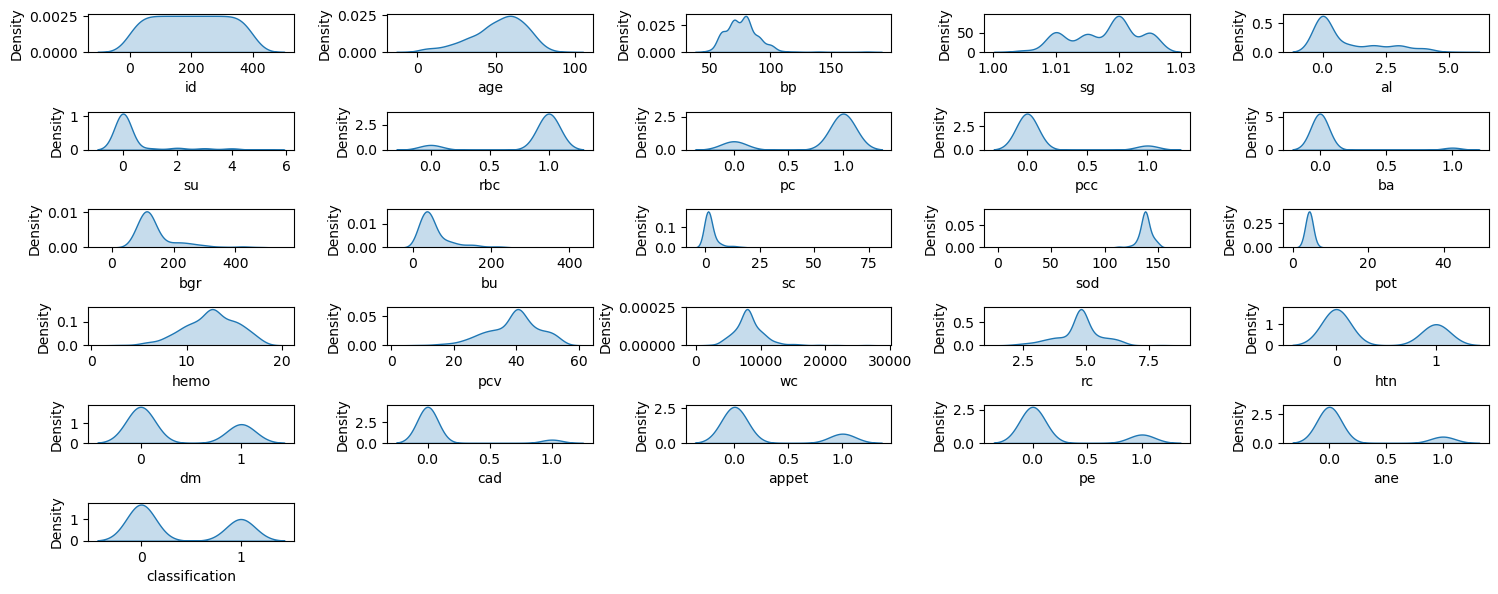

In [14]:
plt.figure(figsize = (15, 6))

for i, col in enumerate (dk.columns, 1):
    plt.subplot(len(dk.columns)//5+1, 5, i)
    sns.kdeplot(dk[col], fill = True)

plt.tight_layout()
plt.show()

In [15]:
dk.drop("id", axis = 1, inplace = True)

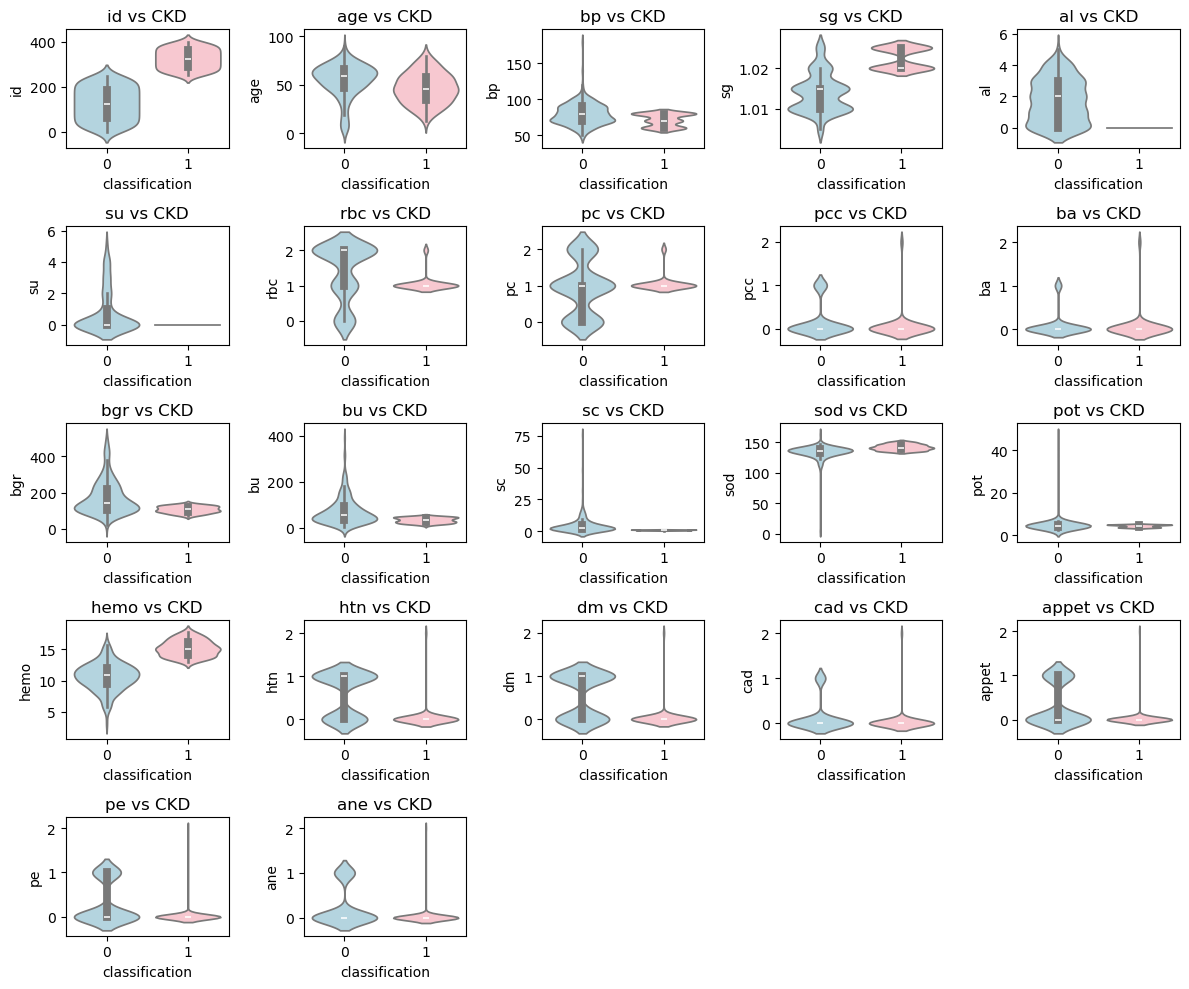

In [34]:
import math 
encoder = {}
for col in cat_col:
    le = LabelEncoder()
    d[col] = le.fit_transform(d[col])
    encoder[col] = le

num_cols = d.select_dtypes(include='number').columns
num_cols = num_cols.drop('classification') 

palette = {'0'   : "lightblue",
          '1' : "pink"}

n_cols = 5
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 2 * n_rows))
axes = axes.flatten()

for i, col in enumerate (num_cols):
    sns.violinplot(x='classification', y=col, data=d, palette = palette, ax = axes[i])
    axes[i].set_title(f"{col} vs CKD")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

In [17]:
encoder['classification'].classes_

array(['ckd', 'notckd'], dtype=object)

In [18]:
print(encoder['classification'].classes_)


['ckd' 'notckd']


In [19]:
log_cols = dk.drop(["classification", "age"], axis = 1).select_dtypes(include = 'number').columns

for col in log_cols:
    dk[col] = np.log10(dk[col] + 1)

In [20]:
x = dk.drop("classification", axis=1)
y = dk["classification"]

In [21]:
fs = RandomForestClassifier( n_estimators= 1200, max_depth= 3, random_state= 90 )
fs.fit(x, y)
fs.feature_importances_

array([4.96670832e-03, 7.30380905e-03, 9.78880926e-02, 6.71334297e-02,
       4.70613237e-03, 1.66036717e-03, 8.10627333e-03, 3.49809255e-04,
       1.09636174e-04, 2.26005934e-02, 2.53835842e-02, 1.34067821e-01,
       2.41392094e-02, 3.06810957e-03, 2.20636327e-01, 1.73678649e-01,
       2.80457986e-03, 8.52764760e-02, 5.80873050e-02, 4.18484917e-02,
       9.52488840e-05, 6.52212977e-03, 7.18514117e-03, 2.38207512e-03])

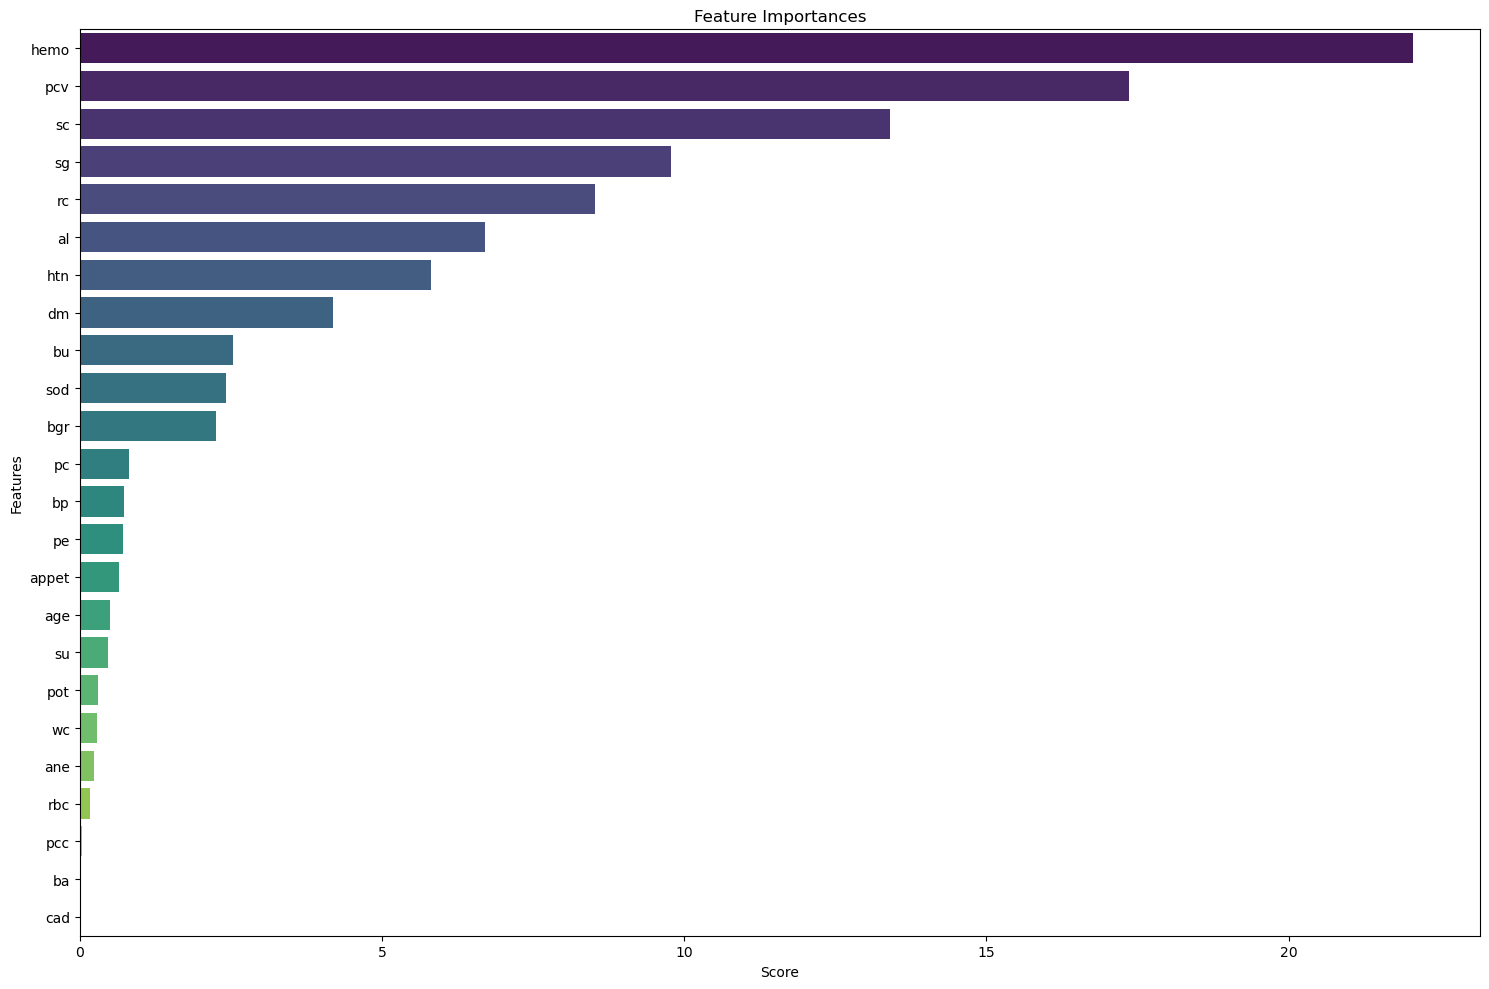

In [22]:
fi = pd.DataFrame({
    "col"   : x.columns,
    "Score" : fs.feature_importances_*100
}).sort_values("Score", ascending = False)

plt.figure(figsize = (15,10))
sns.barplot(x = "Score", y = "col", data = fi, palette = 'viridis')
plt.title("Feature Importances")
plt.xlabel('Score')
plt.ylabel("Features")
plt.tight_layout()
plt.show()

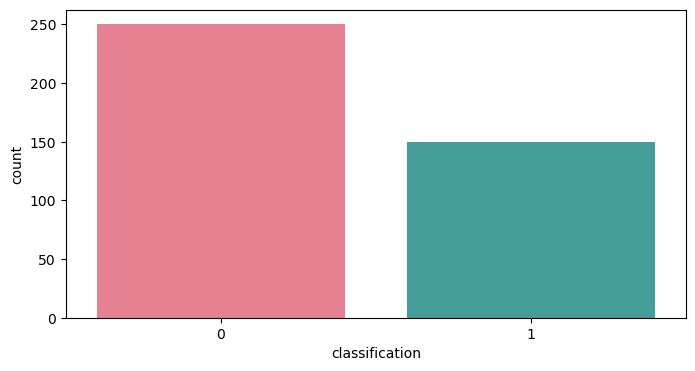

In [23]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'classification', data = dk, palette = "husl")
plt.show()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)

In [25]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [26]:
LR = LogisticRegression(random_state = 5, class_weight = 'balanced')
LR.fit(x_train_scaled, y_train)

LR_y_prediction = LR.predict(x_test_scaled)
LR_y_prob = LR.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, LR_y_prediction))
print("ROC-AUC:", round(roc_auc_score(y_test, LR_y_prob),2))

print("Training Accuracy : ", round(accuracy_score(y_train, LR.predict(x_train_scaled)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, LR_y_prediction), 2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.96      1.00      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

ROC-AUC: 1.0
Training Accuracy :  1.0
Test Accuracy :  0.98


In [27]:
RFC = RandomForestClassifier(random_state =0, n_estimators = 100, max_depth = 3)
RFC.fit(x_train_scaled, y_train)

RFC_y_prediction = RFC.predict(x_test_scaled)
RFC_y_prob = RFC.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, RFC_y_prediction))
print("ROC-AUC:", round(roc_auc_score(y_test, RFC_y_prob),2))

print("Training Accuracy : ", round(accuracy_score(y_train, RFC.predict(x_train_scaled)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, RFC_y_prediction), 2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       0.98      0.98      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

ROC-AUC: 1.0
Training Accuracy :  0.99
Test Accuracy :  0.98


In [28]:
DT = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced', criterion = 'gini')
DT.fit(x_train_scaled, y_train)

DT_y_prediction = DT.predict(x_test_scaled)
DT_y_proba = DT.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, DT_y_prediction))
print("ROC_AUC : ", round(roc_auc_score(y_test, DT_y_proba),2))

print("Training Accuracy : ", round(accuracy_score(y_train, DT.predict(x_train_scaled)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, DT_y_prediction), 2))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        74
           1       0.90      1.00      0.95        46

    accuracy                           0.96       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.96      0.96      0.96       120

ROC_AUC :  0.97
Training Accuracy :  1.0
Test Accuracy :  0.96


In [29]:
GBC = GradientBoostingClassifier(random_state = 0, n_estimators = 50, learning_rate = 1.5, min_samples_split = 3 )
GBC.fit(x_train_scaled, y_train)

GBC_y_prediction = GBC.predict(x_test_scaled)
GBC_y_proba = GBC.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, GBC_y_prediction))
print("ROC_AUC : ", round(roc_auc_score(y_test, GBC_y_proba),2))

print("Training Accuracy : ", round(accuracy_score(y_train, GBC.predict(x_train_scaled)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, GBC_y_prediction), 2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.96      1.00      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

ROC_AUC :  1.0
Training Accuracy :  1.0
Test Accuracy :  0.98


In [30]:
XGBC = XGBClassifier(random_state = 150, n_estimators = 200, learning_rate = 0.5, max_depth = 5)
XGBC.fit(x_train_scaled, y_train)

XGBC_y_prediction = XGBC.predict(x_test_scaled)
XGBC_y_proba = XGBC.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, XGBC_y_prediction))
print("ROC_AUC : ", round(roc_auc_score(y_test, XGBC_y_proba),2))

print("Training Accuracy : ", round(accuracy_score(y_train, XGBC.predict(x_train_scaled)), 2))
print("Test Accuracy : ", round(accuracy_score(y_test, XGBC_y_prediction), 2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.98      1.00      0.99        46

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

ROC_AUC :  1.0
Training Accuracy :  1.0
Test Accuracy :  0.99


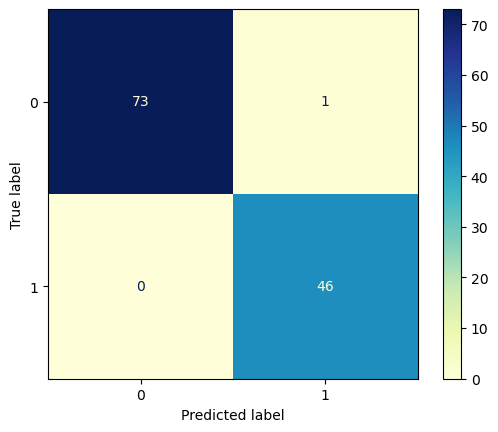

In [31]:
cm = confusion_matrix(y_test, XGBC_y_prediction)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = XGBC.classes_)
display.plot(cmap = "YlGnBu")
plt.show()

In [32]:
joblib.dump(XGBC, "models/Kidney/XGBC_Kidney.pkl")
joblib.dump(encoder, "models/Kidney/XGBC_kidney_encoder.pkl")
joblib.dump(scaler, "models/Kidney/XGBC_kidney_scaler.pkl")
joblib.dump(x_train.columns.tolist(), "Models/Kidney/XGBC_feature_names_kidney.pkl")

['Models/Kidney/XGBC_feature_names_kidney.pkl']